In [3]:
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline

## 概率密度图

In [13]:
def pdf(samples, bins=10, scope=[]):
    """计算概率密度图。pyplot库中的hist()方法可以实现类似的功能。"""
    if scope:
        floor_value, ceil_value = scope
    else:
        floor_value = min(samples)
        ceil_value = max(samples)
    total_sample_num = len(samples)
    if total_sample_num == 0 or ceil_value == floor_value:
        print("Error, no samples or all samples are the same")
        return [], []

    samples = sorted(samples)
    step_size = (ceil_value - floor_value) / bins
    bin_value = floor_value + step_size / 2
    right_threshold = floor_value + step_size
    right_index = -1
    bin_list = []
    probability_list = []

    for i in range(bins):
        left_index = right_index
        while right_index + 1 < total_sample_num and samples[right_index + 1] <= right_threshold:
            right_index += 1
        bin_sample_num = right_index - left_index
        bin_probability = bin_sample_num / total_sample_num

        probability_list.append(bin_probability)
        bin_list.append(bin_value)

        bin_value += step_size
        right_threshold += step_size

    return bin_list, probability_list

### 在曲线图上绘制

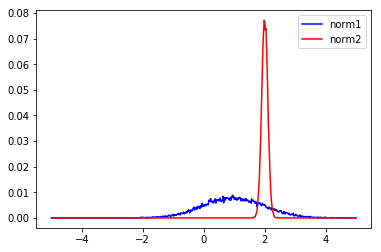

In [17]:
arr1 = np.random.normal(1, 1, 20000)
arr2 = np.random.normal(2, 0.1, 20000)
X1, Y1 = pdf(arr1, 512, [-5, 5])
X2, Y2 = pdf(arr2, 512, [-5, 5])
plt.figure()
plt.plot(X1, Y1, 'b', label='norm1')
plt.plot(X2, Y2, 'r', label='norm2')
plt.legend(loc='best')
plt.show()

### 利用柱状图进行绘制
当两侧概率密度大，中间概率密度小，绘制概率密度曲线图显得奇怪，此时可以采用柱状图绘制曲线

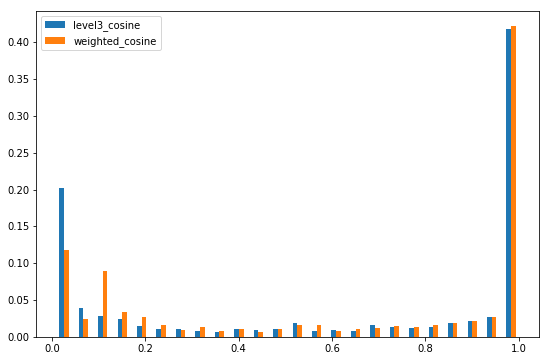

In [11]:
X1 = [0.020833333333333332, 0.0625, 0.10416666666666666, 0.14583333333333331, 0.18749999999999997, 0.22916666666666663, 0.2708333333333333, 0.3125, 0.3541666666666667, 0.39583333333333337, 0.43750000000000006, 0.47916666666666674, 0.5208333333333334, 0.5625, 0.6041666666666666, 0.6458333333333333, 0.6874999999999999, 0.7291666666666665, 0.7708333333333331, 0.8124999999999998, 0.8541666666666664, 0.895833333333333, 0.9374999999999997, 0.9791666666666663]
X2 = X1
Y1 = [0.20266666666666666, 0.039466666666666664, 0.028266666666666666, 0.024533333333333334, 0.014933333333333333, 0.0112, 0.0112, 0.008, 0.006933333333333333, 0.010133333333333333, 0.009066666666666667, 0.0112, 0.018666666666666668, 0.007466666666666667, 0.009066666666666667, 0.008533333333333334, 0.015466666666666667, 0.013866666666666666, 0.012266666666666667, 0.013866666666666666, 0.018666666666666668, 0.0208, 0.0272, 0.41813333333333336]
Y2 = [0.11733333333333333, 0.024533333333333334, 0.08906666666666667, 0.0336, 0.02666666666666667, 0.016, 0.009066666666666667, 0.013333333333333334, 0.008, 0.010133333333333333, 0.0064, 0.0112, 0.016533333333333334, 0.016533333333333334, 0.008, 0.010133333333333333, 0.011733333333333333, 0.014933333333333333, 0.013333333333333334, 0.016, 0.018666666666666668, 0.021333333333333333, 0.0272, 0.42186666666666667]
plt.figure(figsize=(9, 6))
plt.bar(X1, Y1, width=0.01, label="level3_cosine")
plt.bar(np.array(X2) + 0.01, Y2, width=0.01, label="weighted_cosine")
plt.legend(loc="best")
plt.show()

# 注：width参数的宽度不是图的像素点，而是X轴上的数值大小。对大的X轴，宜采用大的宽度

## 随天数变化曲线图

In [34]:
dates = ['20190715', '20190716', '20190717', '20190718', '20190719', '20190720', '20190721', '20190722', '20190723', '20190724', '20190725', '20190726', '20190727', '20190728', '20190729']
dates = [datetime.strptime(d, '%Y%m%d').date() for d in dates]
Y1 = np.random.uniform(0.58, 0.7, len(dates))
Y2 = np.random.uniform(0.2, 0.35, len(dates))

[0.66940043 0.59110275 0.62224921 0.59942075 0.58812233 0.67344963
 0.59111571 0.58102001 0.60374882 0.58396361 0.68916375 0.67112757
 0.58989612 0.69066203 0.59601811] [0.24902328 0.30045132 0.25645164 0.20965161 0.34855455 0.24439284
 0.25969389 0.25868695 0.23188247 0.2233456  0.28922882 0.21529259
 0.33996293 0.23082378 0.32309407]


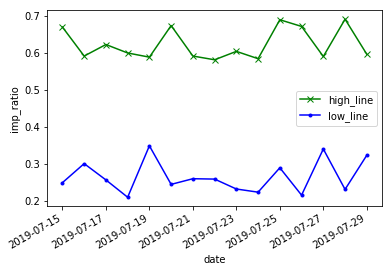

In [35]:
plt.figure()
plt.plot(dates, Y1, '-gx', label = 'high_line')
plt.plot(dates, Y2, '-b.', label = 'low_line')
plt.xlabel("date")
plt.ylabel("imp_ratio")
plt.legend()
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.show()